In [1]:
from datastructures.rendering import render_incidence, incidence_artifacts, sequence_permutation_from_order, edges_to_Ein_Eout, all_comps_below
from datastructures.graphutils import namefromid, VAR, COMP, SOLVER
import matplotlib.pyplot as plt
from collections import OrderedDict
from datastructures.workflow import order_from_tree

In [40]:
Ein = ({
    1: (2,4),
    2: (1,),
    3: (1,),
    4: (4,)
})
Eout = ({
    1: (1,),
    2: (2,),
    3: (3,),
    4: (None,)
})
edges = (Ein, Eout, {})
comp_tree = OrderedDict({3:1,1:1,2:1,4:1})
comp_tree = OrderedDict({3:1,1:2,2:2,4:1})
solver_tree = {2:1}
var_tree = {4:1}
comp_tree_ordered = OrderedDict({1:2,2:2,3:1,4:1})

In [31]:
Ein = ({
    1: (2,4),
    2: (1,),
    3: (1,3),
})
Eout = ({
    1: (1,),
    2: (2,),
    3: (None,),
})
edges = (Ein, Eout, {})
comp_tree = OrderedDict({3:1,1:1,2:1})
#comp_tree = OrderedDict({1:2,2:2,3:1,4:1})
comp_tree_ordered = OrderedDict({1:2,2:2,3:1})
solver_tree = {}
var_tree = {3:1}

In [41]:
tree = (comp_tree, solver_tree, var_tree)
tree_ordered = (comp_tree_ordered, solver_tree, var_tree)

In [42]:
order = order_from_tree(comp_tree, solver_tree, Eout, False, False)

In [43]:
order

[(COMP, 3, 1), (COMP, 1, 2), (COMP, 2, 2), (ENDCOMP, 4, 1)]

In [44]:
sequence, permutation, Ein, Eout, solver_iterator = incidence_artifacts(edges, tree, True)

In [45]:
nodetyperepr_hdsm = {VAR: 'x_{{{}}}', COMP: 'f_{{{}}}', SOLVER: '{}'}
namingfunc_hdsm = namefromid(nodetyperepr_hdsm)

In [46]:
plt.rcParams['text.usetex'] = True

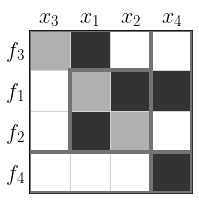

In [47]:
_,ax = render_incidence(edges, tree, namingfunc_hdsm, figname='hdsm_flat_example.png', save=True, figsize=(3,3), fontsize=22, rotation=0, patchwidth=4, hideticks=True);

## More complex

In [2]:
from datastructures.polycasebuilder import generate_random_prob, eqv_to_edges_tree

In [55]:
n_eqs = 9
n_vars = 12
seed = 9#8 is triang#seed 10 is nice 42 
sparsity = 0.5#0.8 1.1 #1.7 1.3
eqv, varinc, output_set = generate_random_prob(n_eqs, n_vars, seed, sparsity)
edges, tree= eqv_to_edges_tree(eqv, output_set, n_eqs, offset=True)

In [56]:
Ftree = OrderedDict([(0,0), (1,1),(2,2),(3,2),(4,1,),(5,1),(6,1),(7,0),(8,0)])
Stree = {2:1, 1:0}
endcomponents = [0,2,5,7]
Eout = {comp: (None,) if comp in endcomponents else outvar for comp,outvar in edges[1].items()}

In [67]:
edges = (edges[0], Eout, {})
tree = (Ftree, Stree, {10:2, 5:1, 0:0, 1:0})

In [68]:
#order = order_from_tree(Ftree, Stree, Eout, False, False)

In [69]:
Eout

{5: (None,),
 2: (None,),
 8: (3,),
 7: (None,),
 3: (6,),
 4: (4,),
 0: (None,),
 6: (7,),
 1: (9,)}

In [70]:
order

[(COMP, 1, 1),
 (COMP, 3, 2),
 (ENDCOMP, 2, 2),
 (COMP, 4, 1),
 (COMP, 6, 1),
 (ENDCOMP, 5, 1),
 (COMP, 8, 0),
 (ENDCOMP, 0, 0),
 (ENDCOMP, 7, 0)]

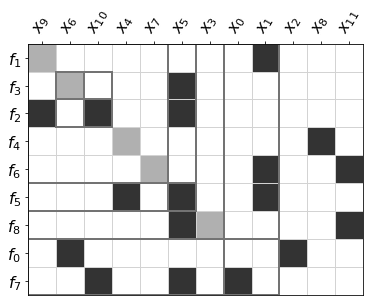

In [71]:
_, ax = render_incidence(edges, tree, namingfunc_hdsm, figsize=(6,6))

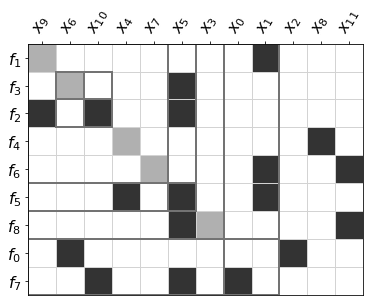

In [72]:
plt.sca(ax)
plt.savefig('hdsm_complex_example.png', dpi=200, bbox_inches='tight')

# Affine functions

In [74]:
Ein = {1: (1,3),
       2: (1,2,3)}
Eout = {1: (None,),
        2: (None,)}